marketing_df : bank client data: 
https://www.kaggle.com/datasets/adityamhaske/bank-marketing-dataset?resource=download

1 - age (numeric)

2 - job : type of job (categorical:
"admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

* ##### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

* ##### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

* ##### Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None



loan_df : Features:
https://www.kaggle.com/datasets/sahideseker/loan-default-prediction-dataset?utm_source=copilot.com&select=loan_default_prediction.csv

loan_id: Unique loan identifier

income: Monthly income of the applicant

loan_amount: Total amount of the loan

employment_status: Employment status (Employed / Unemployed)

default: Whether the loan was defaulted (1 = Yes, 0 = No)


INSEE API selected dataset 

1. Population 
   
    -'PTOT' : total legal population of the département (Private + collective housing),
   
    -'PCAP' : population of the préfecture city (eg : DEP‑75 → Paris, DEP‑95 → Cergy...),
   
    -'PMUN' : municipal population, meaning the **population living in private households** only is housing and urbanism indicators
selected dataset IDs

2. Income	DS_ERFS_MENAGE_SL	Revenu disponible et pauvreté
3. Unemployment 	DS_RP_EMPLOI_LR_PRINC	Population active et chômage
4. Housing	DS_RP_LOGEMENT_PRINC	Résidences principales
5. Age structure	DS_BTS_SAL_EQTP_SEX_AGE	Salaires par sexe et âge
6. Education	DS_RP_DIPLOMES_PRINC	Diplômes de la population

In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import importlib
import insee_api_functions
import functions

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

importlib.reload(insee_api_functions)
importlib.reload(functions)

df_uci = pd.read_csv("../data/raw/bank_marketing.csv", sep=';')
df_loan = pd.read_csv("../data/raw/loan_default.csv")
df_uci

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 1. The UCI dataset

### 1.1. Explore and clean the UCI dataset

In [2]:
from functions import explore_dataset

explore_dataset(df_uci)


=== Dataset ===

Shape: (45211, 17)

Columns:
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Info:
<class 'pandas.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  str  
 2   marital    45211 non-null  str  
 3   education  45211 non-null  str  
 4   default    45211 non-null  str  
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  str  
 7   loan       45211 non-null  str  
 8   contact    45211 non-null  str  
 9   day        45211 non-null  int64
 10  month      45211 non-null  str  
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  s

Conclusion 
The UCI dataset looks clean and well-structured:

45,211 rows and 17 columns

No missing values

Columns are correctly typed (int and str)

In [3]:
from functions import clean_uci_dataset

df_uci_clean = clean_uci_dataset(df_uci)


Cleaning complete. Shape: (45211, 17)


In [4]:
df_uci_clean.info()
df_uci_clean.isna().sum()*100/len(df_uci_clean)


<class 'pandas.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        44923 non-null  str  
 2   marital    45211 non-null  str  
 3   education  43354 non-null  str  
 4   default    45211 non-null  str  
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  str  
 7   loan       45211 non-null  str  
 8   contact    32191 non-null  str  
 9   day        45211 non-null  int64
 10  month      45211 non-null  str  
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   8252 non-null   str  
 16  y          45211 non-null  int64
dtypes: int64(8), str(9)
memory usage: 5.9 MB


age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
y             0.000000
dtype: float64

In [5]:
df_uci_clean['contact_missing'] = df_uci_clean['contact'].isna().astype(int)
df_uci_clean['contact_missing'] 

0        1
1        1
2        1
3        1
4        1
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: contact_missing, Length: 45211, dtype: int64

In [6]:
from functions import handle_missing_values_uci

df_uci_final = handle_missing_values_uci(df_uci_clean)

df_uci_final.y.isna().value_counts()


Missing-value handling complete. Shape: (43193, 17)


y
False    43193
Name: count, dtype: int64

In [7]:
# Save cleaned and explored uci dataset
df_uci_final.to_csv("load_and_clean_uci_data_davy.csv", index=False)


### 1.2. EDA


[1] Target distribution
What: Distribution of the target variable.
Why: To check for class imbalance and understand baseline conversion rates.



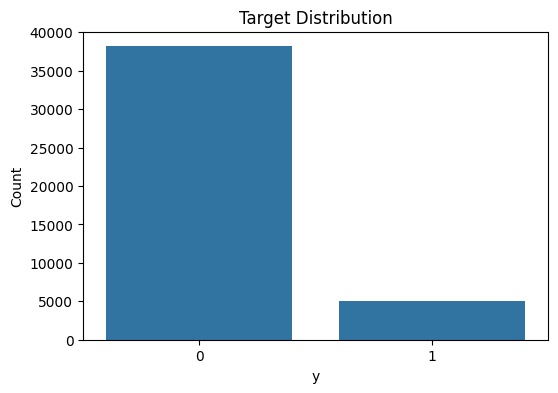


[2] Numeric feature distributions
What: Histograms of numeric variables.
Why: To detect skewness, outliers, and typical value ranges,
     which influence scaling choices and model robustness.



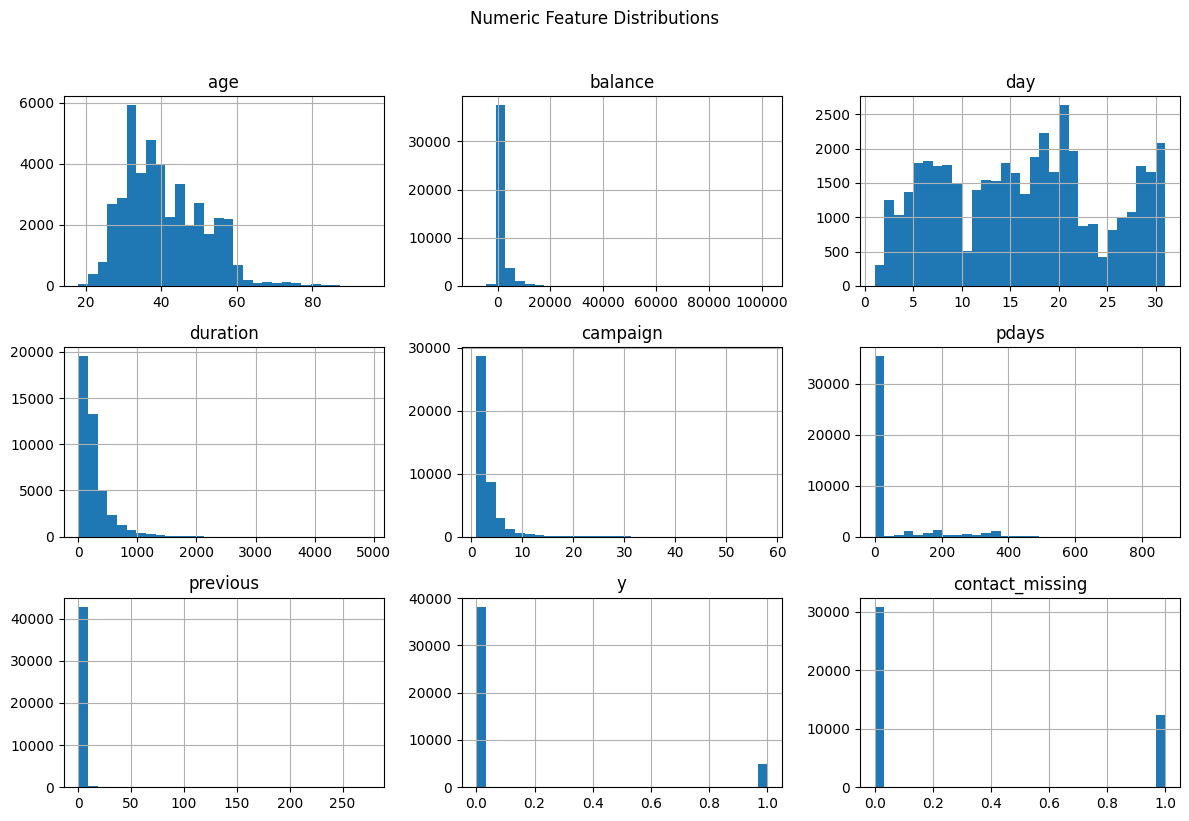


[3] Subscription rate by job
What: Mean target value by job category.
Why: To identify professional segments with higher conversion rates,
     which is key for marketing segmentation and prioritization.



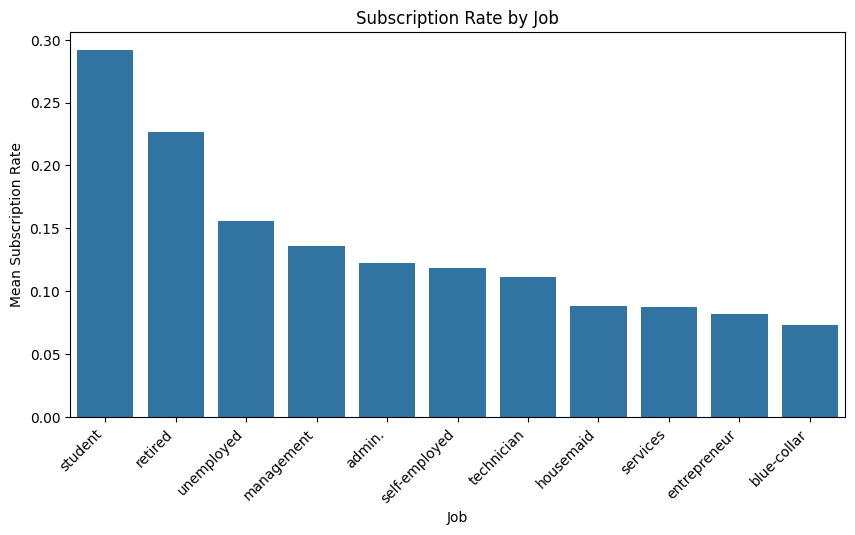


[4] Balance vs target
What: Boxplot of account balance by target.
Why: To test whether higher balances are associated with higher subscription rates,
     which supports targeting higher-value clients.



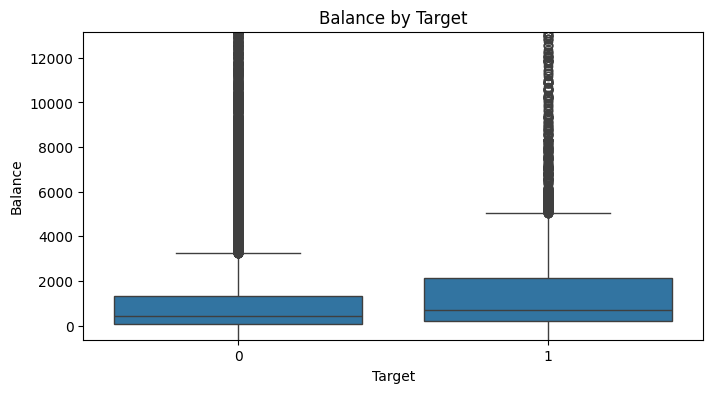


[5] Correlation matrix of numeric features
What: Correlation heatmap of numeric variables.
Why: To understand relationships between features and with the target,
     and to detect potential multicollinearity before modeling.



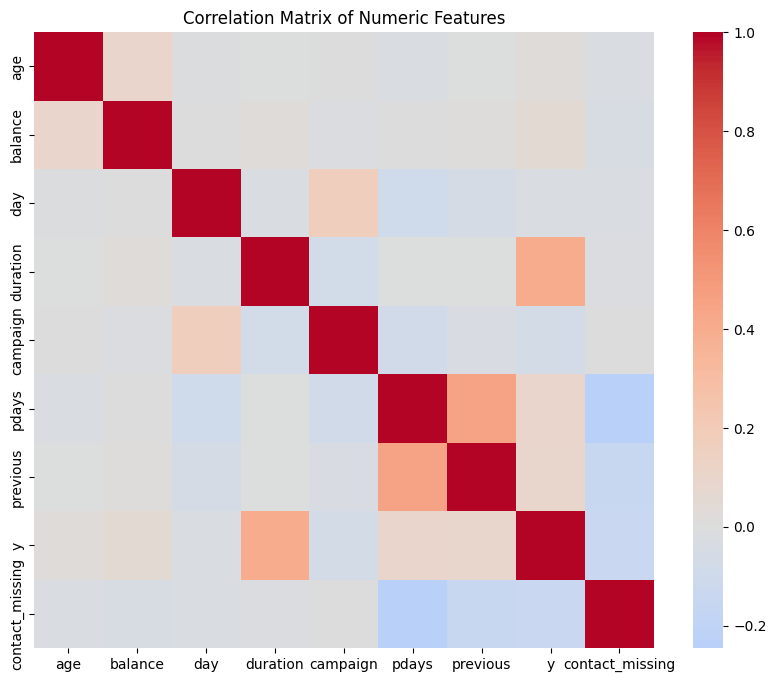

In [8]:
from functions import eda_uci_dataset
eda_uci_dataset(df_uci_final, target_col='y')

### 1.3. Feature Engineering

In [9]:
df_uci_feat= pd.read_csv("load_and_clean_uci_data_davy.csv")
df_uci_feat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,contact_missing
0,58,management,married,tertiary,no,2143,yes,no,missing,5,may,261,1,-1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,missing,5,may,151,1,-1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,missing,5,may,76,1,-1,0,0,1
3,35,management,married,tertiary,no,231,yes,no,missing,5,may,139,1,-1,0,0,1
4,28,management,single,tertiary,no,447,yes,yes,missing,5,may,217,1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,1,0
43189,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,1,0
43190,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1,0
43191,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0,0


In [10]:
# 2. Separate features and target
X = df_uci_feat.drop(columns=['y', 'day', 'default', 'contact'])
y = df_uci_feat['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
43188    1
43189    1
43190    1
43191    0
43192    0
Name: y, Length: 43193, dtype: int64

### Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [12]:
X_train.shape


(34554, 13)

In [13]:
X_test.shape

(8639, 13)

In [14]:
y_train.shape

(34554,)

In [15]:
y_test.shape

(8639,)

In [16]:
### Variable type

In [17]:
X_train

,age,job,marital,education,balance,housing,loan,month,duration,campaign,pdays,previous,contact_missing
32154,32,management,married,tertiary,1683,yes,yes,apr,72,2,-1,0,0
1312,39,management,single,tertiary,375,yes,no,may,66,2,-1,0,1
13998,42,technician,married,secondary,422,yes,no,jul,400,1,-1,0,0
449,37,technician,single,secondary,17,yes,no,may,164,1,-1,0,1
7743,31,technician,single,tertiary,932,yes,no,jun,169,1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32103,49,management,married,tertiary,603,yes,no,apr,590,3,-1,0,0
30403,27,technician,single,tertiary,4661,no,no,apr,114,1,-1,0,0
21243,49,blue-collar,married,primary,1898,no,no,aug,159,1,-1,0,0
42613,40,management,single,tertiary,15,no,yes,aug,4,1,-1,0,1


In [18]:
    # 3. Identify column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number')
categorical_cols

C:\Users\davyg\AppData\Local\Temp\ipykernel_13392\146708364.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include='object').columns.tolist()


['job', 'marital', 'education', 'housing', 'loan', 'month']

One-hot encoding

In [19]:
X_encoded = pd.get_dummies(X, columns=['job', 'marital', 'education', 'housing', 'loan', 'month'], drop_first=True)
X_encoded

,age,balance,duration,campaign,pdays,previous,contact_missing,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,261,1,-1,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,29,151,1,-1,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,2,76,1,-1,0,1,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,35,231,139,1,-1,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,28,447,217,1,-1,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,977,3,-1,0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
43189,71,1729,456,2,-1,0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
43190,72,5715,1127,5,184,3,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
43191,57,668,508,4,-1,0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [20]:
print(type(categorical_cols))
print(categorical_cols)


<class 'list'>
['job', 'marital', 'education', 'housing', 'loan', 'month']


In [21]:
# ask to give a numpy array instead of sparse
ohe = OneHotEncoder(sparse_output=False, drop='first') # To avoid having an sparse_matrix as output

ohe.fit(X_train[['job', 'marital', 'education', 'housing', 'loan', 'month']]) # The .fit() method determines the unique values of each column
X_train_trans_np = ohe.transform(X_train[['job', 'marital', 'education', 'housing', 'loan', 'month']])
X_train_trans_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(34554, 27))

In [22]:
X_train_trans_df = pd.DataFrame(X_train_trans_np, columns=ohe.get_feature_names_out(), index=X_train.index)
X_train_trans_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
32154,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1312,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21243,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42613,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X_test_trans_np = ohe.transform(X_test[['job', 'marital', 'education', 'housing', 'loan', 'month']])
X_test_trans_np

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(8639, 27))

In [24]:
X_test_trans_df = pd.DataFrame(X_test_trans_np, columns=ohe.get_feature_names_out(), index=X_test.index)
X_test_trans_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
12346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4006,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2482,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23743,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32094,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26188,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scaler

In [25]:
available_numerical_cols = [col for col in numerical_cols if col in X_train.columns]

scaler = StandardScaler()

scaler.fit(X_train[available_numerical_cols])

X_train_scaled_np = scaler.transform(X_train[available_numerical_cols])
X_test_scaled_np  = scaler.transform(X_test[available_numerical_cols])

X_train_standarized = pd.DataFrame(X_train_scaled_np, columns=scaler.get_feature_names_out(), index=X_train.index)
X_test_standarized  = pd.DataFrame(X_test_scaled_np, columns=scaler.get_feature_names_out(), index=X_test.index)
X_test_standarized

,age,balance,duration,campaign,pdays,previous,contact_missing
12346,-0.639542,-0.483612,-0.539530,-0.248137,-0.412166,-0.242136,-0.627052
4006,0.600385,-0.547292,-0.254712,1.076409,-0.412166,-0.242136,1.594764
2482,-1.021058,-0.243563,-0.385574,-0.248137,-0.412166,-0.242136,1.594764
24728,-0.830300,-0.363254,4.783478,-0.579273,-0.412166,-0.242136,-0.627052
23743,0.123490,0.488586,-0.424063,-0.248137,-0.412166,-0.242136,-0.627052
...,...,...,...,...,...,...,...
28277,-0.830300,1.507127,0.149421,-0.579273,-0.412166,-0.242136,-0.627052
32094,-0.162647,-0.272902,-0.654996,0.083000,-0.412166,-0.242136,-0.627052
26188,0.886522,18.697633,0.230247,0.083000,-0.412166,-0.242136,-0.627052
32269,-0.162647,-0.081863,-0.212374,-0.579273,-0.412166,-0.242136,-0.627052


### Concatenate preprocessed data

In [26]:
X_train_full = pd.concat([X_train_standarized,X_train_trans_df], axis=1)
X_train_full

,age,balance,duration,campaign,pdays,previous,contact_missing,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
32154,-0.830300,0.109842,-0.720427,-0.248137,-0.412166,-0.242136,-0.627052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1312,-0.162647,-0.326246,-0.743520,-0.248137,-0.412166,-0.242136,1.594764,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13998,0.123490,-0.310577,0.542007,-0.579273,-0.412166,-0.242136,-0.627052,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
449,-0.353405,-0.445604,-0.366330,-0.579273,-0.412166,-0.242136,1.594764,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7743,-0.925679,-0.140542,-0.347085,-0.579273,-0.412166,-0.242136,1.594764,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32103,0.791143,-0.250231,1.273295,0.083000,-0.412166,-0.242136,-0.627052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30403,-1.307195,1.102712,-0.558774,-0.579273,-0.412166,-0.242136,-0.627052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21243,0.791143,0.181524,-0.385574,-0.579273,-0.412166,-0.242136,-0.627052,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42613,-0.067268,-0.446271,-0.982151,-0.579273,-0.412166,-0.242136,1.594764,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X_test_full = pd.concat([X_test_standarized,X_test_trans_df], axis=1)
X_test_full

,age,balance,duration,campaign,pdays,previous,contact_missing,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
12346,-0.639542,-0.483612,-0.539530,-0.248137,-0.412166,-0.242136,-0.627052,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4006,0.600385,-0.547292,-0.254712,1.076409,-0.412166,-0.242136,1.594764,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2482,-1.021058,-0.243563,-0.385574,-0.248137,-0.412166,-0.242136,1.594764,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24728,-0.830300,-0.363254,4.783478,-0.579273,-0.412166,-0.242136,-0.627052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23743,0.123490,0.488586,-0.424063,-0.248137,-0.412166,-0.242136,-0.627052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28277,-0.830300,1.507127,0.149421,-0.579273,-0.412166,-0.242136,-0.627052,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32094,-0.162647,-0.272902,-0.654996,0.083000,-0.412166,-0.242136,-0.627052,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26188,0.886522,18.697633,0.230247,0.083000,-0.412166,-0.242136,-0.627052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32269,-0.162647,-0.081863,-0.212374,-0.579273,-0.412166,-0.242136,-0.627052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_full, y_train)

# Predictions
y_pred = model.predict(X_test_full)
y_proba = model.predict_proba(X_test_full)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Display
print(f"📊 Classification Metrics:")
print(f"--------------------------")
print(f"Accuracy       : {acc:.2f}")
print(f"Precision      : {prec:.2f}")
print(f"Recall         : {rec:.2f}")
print(f"F1 Score       : {f1:.2f}")
print(f"AUC (ROC)      : {auc:.2f}")


📊 Classification Metrics:
--------------------------
Accuracy       : 0.90
Precision      : 0.61
Recall         : 0.28
F1 Score       : 0.38
AUC (ROC)      : 0.89


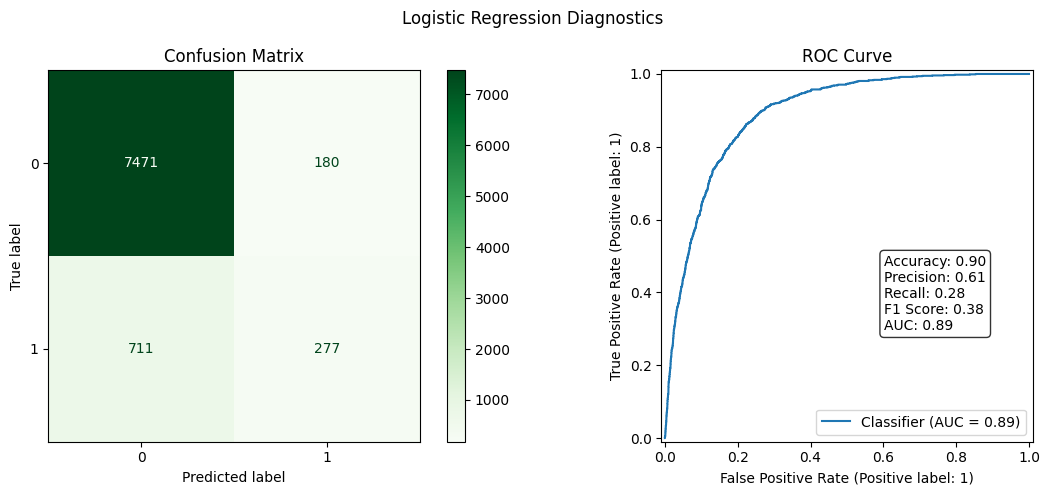

In [29]:
from sklearn.linear_model import LogisticRegression
from functions import classification_diagnostic_plot

# 1. Train on preprocessed features
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_full, y_train)

# 2. Evaluate on preprocessed test features
classification_diagnostic_plot(
    log_reg_model,
    X_test_full,
    y_test,
    title="Logistic Regression Diagnostics"
)


### Interpretations:


Accuracy :	90% of predictions are correct overall — but this is misleading due to class imbalance.
Precision :	When the model predicts “yes” (1), it’s correct 61% of the time.
Recall	: The model only finds 28% of actual “yes” cases — it misses most subscribers.
F1 Score : A balance between precision and recall is low, due to poor recall.
AUC (ROC) : Very good discrimination between classes based on probability — the model ranks well.


711 false negatives, are actual subscribers that the model failed to identify
277 true positives means that the model correctly predicted subscribers
180 false positives, when the model predicted “yes” but actually “no”

**Business interpretation**

The company is missing 72% of potential subscribers

But when it targets someone, it's right 61% of the time

We  need better recall to identify more true subscribers.




📊 Classification Metrics (Threshold = 0.3):
---------------------------------------------
Accuracy        : 0.89
Precision       : 0.52
Recall          : 0.48
F1 Score        : 0.50
AUC (ROC)       : 0.89


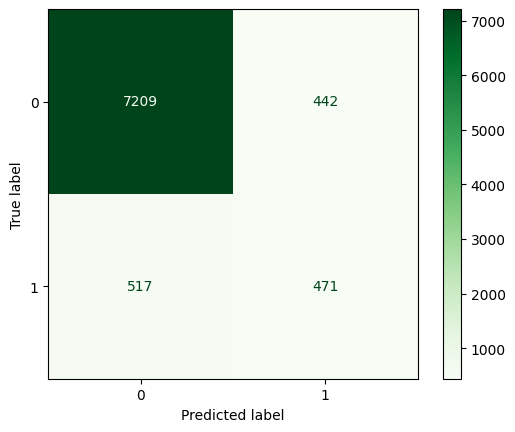

In [30]:
# let's adjusting the decision threshold to improve recall
# 1. Get predicted probabilities
y_proba = log_reg_model.predict_proba(X_test_full)[:, 1]

# 2. Apply custom threshold
threshold = 0.3   # I also need to try with a threshold 0.4, 0.2, or 0.1
y_pred_thresh = (y_proba >= threshold).astype(int)

# 3. Compute metrics
acc = accuracy_score(y_test, y_pred_thresh)
prec = precision_score(y_test, y_pred_thresh)
rec = recall_score(y_test, y_pred_thresh)
f1 = f1_score(y_test, y_pred_thresh)
auc = roc_auc_score(y_test, y_proba)

# 4. Display metrics
print(f"\n📊 Classification Metrics (Threshold = {threshold}):")
print("---------------------------------------------")
print(f"Accuracy        : {acc:.2f}")
print(f"Precision       : {prec:.2f}")
print(f"Recall          : {rec:.2f}")
print(f"F1 Score        : {f1:.2f}")
print(f"AUC (ROC)       : {auc:.2f}")

# 5. Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thresh, cmap="Greens")


517 false negatives, are actual subscribers that the model failed to identify
471 true positives means that the model correctly predicted subscribers
442 false positives, when the model predicted “yes” but actually “no”


📊 Classification Metrics (Class Weight = 'balanced'):
---------------------------------------------
Accuracy        : 0.82
Precision       : 0.38
Recall          : 0.80
F1 Score        : 0.51
AUC (ROC)       : 0.90


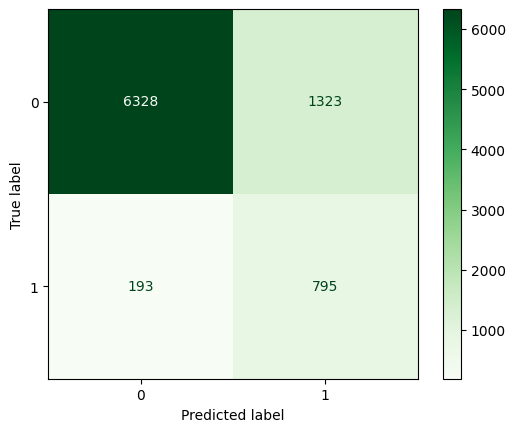

In [32]:

# 1. Train model with class weighting
log_reg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg_balanced.fit(X_train_full, y_train)

# 2. Predictions
y_pred = log_reg_balanced.predict(X_test_full)
y_proba = log_reg_balanced.predict_proba(X_test_full)[:, 1]

# 3. Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# 4. Display metrics
print("\n📊 Classification Metrics (Class Weight = 'balanced'):")
print("---------------------------------------------")
print(f"Accuracy        : {acc:.2f}")
print(f"Precision       : {prec:.2f}")
print(f"Recall          : {rec:.2f}")
print(f"F1 Score        : {f1:.2f}")
print(f"AUC (ROC)       : {auc:.2f}")

# 5. Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Greens")


### Train a Random Forest

In [33]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',   # helps with imbalance
    random_state=0
)

rf_model.fit(X_train_full, y_train)

y_pred = rf_model.predict(X_test_full)
y_proba = rf_model.predict_proba(X_test_full)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("\n📊 Random Forest (no SMOTE):")
print("--------------------------------")
print(f"Accuracy  : {acc:.2f}")
print(f"Precision : {prec:.2f}")
print(f"Recall    : {rec:.2f}")
print(f"F1 Score  : {f1:.2f}")
print(f"AUC       : {auc:.2f}")



📊 Random Forest (no SMOTE):
--------------------------------
Accuracy  : 0.90
Precision : 0.64
Recall    : 0.30
F1 Score  : 0.41
AUC       : 0.92


### Combining data again


In [35]:
df_uci_clean.isna().sum()*100/len(df_uci_feat)

age                 0.000000
job                 0.666775
marital             0.000000
education           4.299308
default             0.000000
balance             0.000000
housing             0.000000
loan                0.000000
contact            30.143773
day                 0.000000
month               0.000000
duration            0.000000
campaign            0.000000
pdays               0.000000
previous            0.000000
poutcome           85.567106
y                   0.000000
contact_missing     0.000000
dtype: float64

In [36]:
df_uci_clean["y"].value_counts(dropna=False)

y
0    39922
1     5289
Name: count, dtype: int64

### 2. Explore and Clean the loan dataset

In [38]:
from functions import explore_dataset

explore_dataset(df_loan)

=== Dataset ===

Shape: (255347, 18)

Columns:
 ['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']

Info:
<class 'pandas.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  str    
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  s

In [39]:
from functions import clean_loan_dataset

df_loan_clean = clean_loan_dataset(df_loan)
df_loan_clean.info()
df_loan_clean.head()


Loan dataset cleaned. Shape: (255347, 18)
<class 'pandas.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_i_d          255347 non-null  str    
 1   age               255347 non-null  int64  
 2   income            255347 non-null  int64  
 3   loan_amount       255347 non-null  int64  
 4   credit_score      255347 non-null  int64  
 5   months_employed   255347 non-null  int64  
 6   num_credit_lines  255347 non-null  int64  
 7   interest_rate     255347 non-null  float64
 8   loan_term         255347 non-null  int64  
 9   d_t_i_ratio       255347 non-null  float64
 10  education         255347 non-null  str    
 11  employment_type   255347 non-null  str    
 12  marital_status    255347 non-null  str    
 13  has_mortgage      255347 non-null  str    
 14  has_dependents    255347 non-null  str    
 15  loan_purpose      255347 non-null  st

,loan_i_d,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,d_t_i_ratio,education,employment_type,marital_status,has_mortgage,has_dependents,loan_purpose,has_co_signer,loan_default
0,i38pquqs96,56,85994,50587,520,80,4,15.23,36,0.44,bachelor's,full-time,divorced,yes,yes,other,yes,0
1,hpsk72wa7r,69,50432,124440,458,15,1,4.81,60,0.68,master's,full-time,married,no,no,other,yes,0
2,c1oz6dpj8y,46,84208,129188,451,26,3,21.17,24,0.31,master's,unemployed,divorced,yes,yes,auto,no,1
3,v2kksfm3un,32,31713,44799,743,0,3,7.07,24,0.23,high school,full-time,married,no,no,business,no,0
4,ey08jdhtzp,60,20437,9139,633,8,4,6.51,48,0.73,bachelor's,unemployed,divorced,no,yes,auto,no,0


### 3. Extract INSEE API DATA

In [40]:
from insee_api_functions import fetch_melodi_dataset
df_insee = fetch_melodi_dataset("DS_POPULATIONS_REFERENCE", "DEP-44")
df_insee

,GEO,FREQ,TIME_PERIOD,POPREF_MEASURE,OBS_VALUE_NIVEAU
0,2025-DEP-44,A,2023,PTOT,1517043.0
1,2025-DEP-44,A,2023,PCAP,29473.0
2,2025-DEP-44,A,2023,PMUN,1487570.0


In [41]:
from insee_api_functions import fetch_melodi_dataset

# Test extraction for Île-de-France (example: Paris)
df_test = fetch_melodi_dataset("DS_POPULATIONS_REFERENCE", "DEP-75")
df_test.shape


(3, 5)

In [42]:
from insee_api_functions import fetch_dep_dataset

df_france = fetch_dep_dataset("DS_POPULATIONS_REFERENCE")
df_france.shape



(84, 6)

In [43]:
df_france.info()

<class 'pandas.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GEO               84 non-null     str    
 1   FREQ              84 non-null     str    
 2   TIME_PERIOD       84 non-null     str    
 3   POPREF_MEASURE    84 non-null     str    
 4   OBS_VALUE_NIVEAU  84 non-null     float64
 5   departement_code  84 non-null     str    
dtypes: float64(1), str(5)
memory usage: 4.1 KB


In [44]:
# Mapping dictionary for readable département names

departement_name_map = {
    "DEP-01": "Ain", "DEP-02": "Aisne", "DEP-03": "Allier", "DEP-04": "Alpes-de-Haute-Provence",
    "DEP-05": "Hautes-Alpes", "DEP-06": "Alpes-Maritimes", "DEP-07": "Ardèche", "DEP-08": "Ardennes",
    "DEP-09": "Ariège", "DEP-10": "Aube", "DEP-11": "Aude", "DEP-12": "Aveyron", "DEP-13": "Bouches-du-Rhône",
    "DEP-14": "Calvados", "DEP-15": "Cantal", "DEP-16": "Charente", "DEP-17": "Charente-Maritime",
    "DEP-18": "Cher", "DEP-19": "Corrèze", "DEP-2A": "Corse-du-Sud", "DEP-2B": "Haute-Corse",
    "DEP-21": "Côte-d'Or", "DEP-22": "Côtes-d'Armor", "DEP-23": "Creuse", "DEP-24": "Dordogne",
    "DEP-25": "Doubs", "DEP-26": "Drôme", "DEP-27": "Eure", "DEP-28": "Eure-et-Loir", "DEP-29": "Finistère",
    "DEP-30": "Gard", "DEP-31": "Haute-Garonne", "DEP-32": "Gers", "DEP-33": "Gironde", "DEP-34": "Hérault",
    "DEP-35": "Ille-et-Vilaine", "DEP-36": "Indre", "DEP-37": "Indre-et-Loire", "DEP-38": "Isère",
    "DEP-39": "Jura", "DEP-40": "Landes", "DEP-41": "Loir-et-Cher", "DEP-42": "Loire", "DEP-43": "Haute-Loire",
    "DEP-44": "Loire-Atlantique", "DEP-45": "Loiret", "DEP-46": "Lot", "DEP-47": "Lot-et-Garonne",
    "DEP-48": "Lozère", "DEP-49": "Maine-et-Loire", "DEP-50": "Manche", "DEP-51": "Marne", "DEP-52": "Haute-Marne",
    "DEP-53": "Mayenne", "DEP-54": "Meurthe-et-Moselle", "DEP-55": "Meuse", "DEP-56": "Morbihan",
    "DEP-57": "Moselle", "DEP-58": "Nièvre", "DEP-59": "Nord", "DEP-60": "Oise", "DEP-61": "Orne",
    "DEP-62": "Pas-de-Calais", "DEP-63": "Puy-de-Dôme", "DEP-64": "Pyrénées-Atlantiques",
    "DEP-65": "Hautes-Pyrénées", "DEP-66": "Pyrénées-Orientales", "DEP-67": "Bas-Rhin", "DEP-68": "Haut-Rhin",
    "DEP-69": "Rhône", "DEP-70": "Haute-Saône", "DEP-71": "Saône-et-Loire", "DEP-72": "Sarthe",
    "DEP-73": "Savoie", "DEP-74": "Haute-Savoie", "DEP-75": "Paris", "DEP-76": "Seine-Maritime",
    "DEP-77": "Seine-et-Marne", "DEP-78": "Yvelines", "DEP-79": "Deux-Sèvres", "DEP-80": "Somme",
    "DEP-81": "Tarn", "DEP-82": "Tarn-et-Garonne", "DEP-83": "Var", "DEP-84": "Vaucluse", "DEP-85": "Vendée",
    "DEP-86": "Vienne", "DEP-87": "Haute-Vienne", "DEP-88": "Vosges", "DEP-89": "Yonne", "DEP-90": "Territoire de Belfort",
    "DEP-91": "Essonne", "DEP-92": "Hauts-de-Seine", "DEP-93": "Seine-Saint-Denis", "DEP-94": "Val-de-Marne",
    "DEP-95": "Val-d’Oise", "DEP-971": "Guadeloupe", "DEP-972": "Martinique", "DEP-973": "Guyane",
    "DEP-974": "La Réunion", "DEP-976": "Mayotte"
}

df_france["departement_name"] = df_france["departement_code"].map(departement_name_map)


In [45]:
# Rename all columns to match the format
df_france.rename(columns={
    "GEO": "geo_code",
    "FREQ": "frequency",
    "TIME_PERIOD": "year",
    "POPREF_MEASURE": "population_type",
    "OBS_VALUE_NIVEAU": "population_value",
    "departement_code": "departement_code",  # already correct
    "departement_name": "departement_name"   # newly added
}, inplace=True)


In [46]:
list(df_france['population_type'].unique())

['PTOT', 'PCAP', 'PMUN']

In [47]:
#df_france.to_csv("insee_population_by_departement.csv", index=False)


In [49]:
import requests, json

url = "https://api.insee.fr/melodi/catalog/all"
response = requests.get(url)
raw_data = json.loads(response.content)

print(type(raw_data))
print(len(raw_data))
print(raw_data[0])


<class 'list'>
100
{'identifier': 'DD_CNA_AGREGATS', 'uri': 'http://id.insee.fr/catalogues/jeuDeDonnees/8b0887f4-ecfb-4675-9e50-5b357b38c8f5', 'title': [{'lang': 'fr', 'content': 'Produit Intérieur Brut (PIB) et grands agrégats économiques'}, {'lang': 'en', 'content': 'Gross domestic product (GDP) and main economic aggregates'}], 'subtitle': [{'lang': 'fr', 'content': 'Comptes nationaux annuels - Base 2020'}, {'lang': 'en', 'content': 'Base 2020 - Annual Results'}], 'description': [{'lang': 'fr', 'content': "Le produit intérieur brut (PIB) est le principal agrégat mesurant l'activité économique. Il correspond à la somme des valeurs ajoutées brutes nouvellement créées par les unités productrices résidentes une année donnée, évaluées au prix du marché. Il donne une mesure des richesses nouvelles créées chaque année par le système productif et permet des comparaisons internationales. Le produit intérieur brut est publié à prix courants et en volume aux prix de l'année précédente chaînés. 

In [50]:
response.json()


[{'identifier': 'DD_CNA_AGREGATS',
  'uri': 'http://id.insee.fr/catalogues/jeuDeDonnees/8b0887f4-ecfb-4675-9e50-5b357b38c8f5',
  'title': [{'lang': 'fr',
    'content': 'Produit Intérieur Brut (PIB) et grands agrégats économiques'},
   {'lang': 'en',
    'content': 'Gross domestic product (GDP) and main economic aggregates'}],
  'subtitle': [{'lang': 'fr',
    'content': 'Comptes nationaux annuels - Base 2020'},
   {'lang': 'en', 'content': 'Base 2020 - Annual Results'}],
  'description': [{'lang': 'fr',
    'content': "Le produit intérieur brut (PIB) est le principal agrégat mesurant l'activité économique. Il correspond à la somme des valeurs ajoutées brutes nouvellement créées par les unités productrices résidentes une année donnée, évaluées au prix du marché. Il donne une mesure des richesses nouvelles créées chaque année par le système productif et permet des comparaisons internationales. Le produit intérieur brut est publié à prix courants et en volume aux prix de l'année précéden

In [51]:
from insee_api_functions import list_melodi_datasets

catalog = list_melodi_datasets()
catalog.head()



,dataset_id,title_fr,description_fr
0,DD_CNA_AGREGATS,Produit Intérieur Brut (PIB) et grands agrégat...,Le produit intérieur brut (PIB) est le princip...
1,DD_CNA_APU,Comptes des administrations publiques,Le secteur institutionnel des administrations ...
2,DD_CNA_BRANCHES,Activité des branches de l'économie,Données annuelles sur l'activité des branches ...
3,DD_CNA_CONSO_MENAGES_COICOP,Consommation des ménages par fonction,Données annuelles de consommation finale effec...
4,DD_CNA_CONSO_MENAGES_PRODUITS,Consommation des ménages par produit,Données annuelles de consommation finale effec...


In [60]:
#Income datasets
revenu_df = catalog[catalog["title_fr"].str.contains("revenu", case=False, na=False)]
revenu_df

,dataset_id,title_fr,description_fr
36,DS_ERFS_MENAGE,Indicateurs de revenu disponible (au niveau de...,Les indicateurs sont calculés au niveau du mén...
37,DS_ERFS_MENAGE_SL,Indicateurs de revenu disponible et de pauvret...,Les indicateurs sont calculés au niveau du mén...
43,DS_FILOSOFI_CC,Principaux indicateurs sur la pauvreté en 2021...,"- Nombre de ménages fiscaux, de personnes et d..."


In [61]:
# Unemployment datasets
chomage_df = catalog[catalog["title_fr"].str.contains("chômage", case=False, na=False)]
chomage_df

,dataset_id,title_fr,description_fr
11,DD_EEC_ANNUEL,"Activité, emploi et chômage - résultats annuel...",Les données sont généralement détaillées par s...
12,DD_EEC_SERIES,"Activité, emploi et chômage - séries longues","Les données sont détaillées par sexe, âge, dip..."
65,DS_RP_EMPLOI_LR_COMP,Population active et chômage,Les données sont détaillées pour la population...
66,DS_RP_EMPLOI_LR_PRINC,Population active et chômage,Les données sont détaillées pour la population...


In [62]:
# Unemployment datasets
logement_df = catalog[catalog["title_fr"].str.contains("logement", case=False, na=False)]
chomage_df

,dataset_id,title_fr,description_fr
11,DD_EEC_ANNUEL,"Activité, emploi et chômage - résultats annuel...",Les données sont généralement détaillées par s...
12,DD_EEC_SERIES,"Activité, emploi et chômage - séries longues","Les données sont détaillées par sexe, âge, dip..."
65,DS_RP_EMPLOI_LR_COMP,Population active et chômage,Les données sont détaillées pour la population...
66,DS_RP_EMPLOI_LR_PRINC,Population active et chômage,Les données sont détaillées pour la population...


In [63]:
# Unemployment datasets
age_df = catalog[catalog["title_fr"].str.contains("âge", case=False, na=False)]
age_df

,dataset_id,title_fr,description_fr
18,DS_BTS_SAL_EQTP_SEX_AGE,Salaires dans le secteur privé selon le sexe e...,"Le champ correspond aux salariés du privé, y c..."
42,DS_FILOSOFI_AGE_TP_NIVVIE,Niveau de vie médian et taux de pauvreté par t...,- Niveau de vie médian\n- Taux de pauvreté à 6...


In [64]:
# Unemployment datasets
education_df = catalog[catalog["title_fr"].str.contains("diplôme|scolarité|éducation", case=False, na=False)]
education_df

,dataset_id,title_fr,description_fr
63,DS_RP_DIPLOMES_PRINC,Diplômes et Formation,Les données sont détaillées pour la population...
64,DS_RP_EDUCATION,Éducation - Scolarisation,Les données sont détaillées pour la population...


In [66]:
# Save each DataFrame
revenu_df.to_csv("indicators_revenu.csv", index=False)
chomage_df.to_csv("indicators_chomage.csv", index=False)
logement_df.to_csv("indicators_logement.csv", index=False)
age_df.to_csv("indicators_age.csv", index=False)
education_df.to_csv("indicators_education.csv", index=False)


In [ ]:
from insee_api_functions import fetch_indicator_for_all_departements

df_income = fetch_indicator_for_all_departements("DS_ERFS_MENAGE_SL")
df_income.head()


In [ ]:
catalog.columns